In [1]:
import quandl
import datetime
import pandas as pd
from pandas_datareader import data, wb
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2016,12,31)

# S&P - 500 ^GSPC Yahoo Finance

In [9]:
sp = data.get_data_yahoo('^GSPC', start, end)

In [10]:
sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [11]:
sp.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
sp.columns = sp.columns+'_SP500'

In [13]:
sp['Return_SP500'] = sp['Adj Close_SP500'].pct_change()
sp.columns

Index(['Open_SP500', 'High_SP500', 'Low_SP500', 'Close_SP500',
       'Adj Close_SP500', 'Volume_SP500', 'Return_SP500'],
      dtype='object')

In [14]:
sp.head()

,Open_SP500,High_SP500,Low_SP500,Close_SP500,Adj Close_SP500,Volume_SP500,Return_SP500
Date,,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000,NaN
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000,0.003116
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000,0.000546
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000,0.004001
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000,0.002882


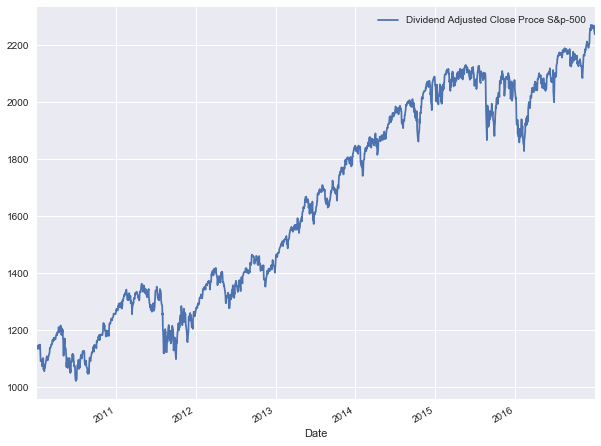

In [58]:
sp['Adj Close_SP500'].plot()
plt.legend(('Dividend Adjusted Close Proce S&p-500',))
plt.show()

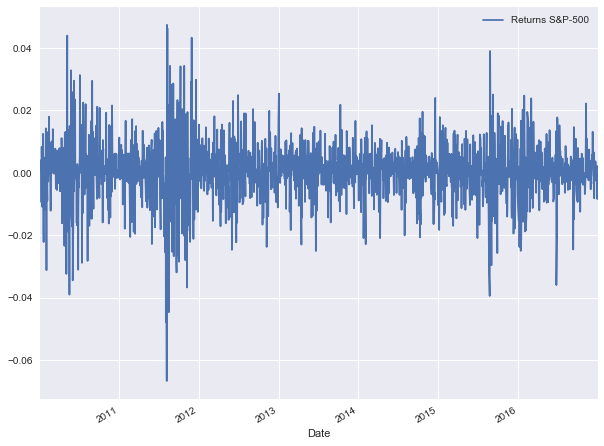

In [59]:
sp['Return_SP500'].plot()
plt.legend(('Returns S&P-500',))
plt.show()

In [15]:
pd.isnull(sp).any().sum()

1

In [16]:
sp.shape

(1762, 7)

# Nasdaq Composite ^IXIC Yahoo Finance

In [17]:
nasdaq = data.get_data_yahoo('^IXIC',start,end)
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000


In [18]:
nasdaq.columns = nasdaq.columns+'_Nasdaq'

In [19]:
nasdaq.columns

Index(['Open_Nasdaq', 'High_Nasdaq', 'Low_Nasdaq', 'Close_Nasdaq',
       'Adj Close_Nasdaq', 'Volume_Nasdaq'],
      dtype='object')

In [20]:
nasdaq['Return_Nasdaq'] = nasdaq['Adj Close_Nasdaq'].pct_change()

In [21]:
nasdaq.columns

Index(['Open_Nasdaq', 'High_Nasdaq', 'Low_Nasdaq', 'Close_Nasdaq',
       'Adj Close_Nasdaq', 'Volume_Nasdaq', 'Return_Nasdaq'],
      dtype='object')

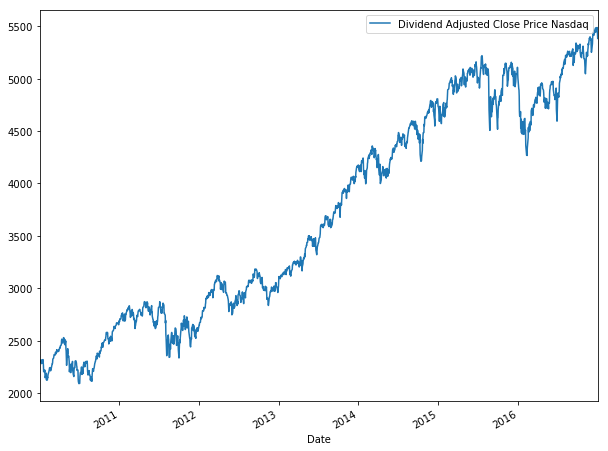

In [22]:
nasdaq['Adj Close_Nasdaq'].plot()
plt.legend(("Dividend Adjusted Close Price Nasdaq",))
plt.show()

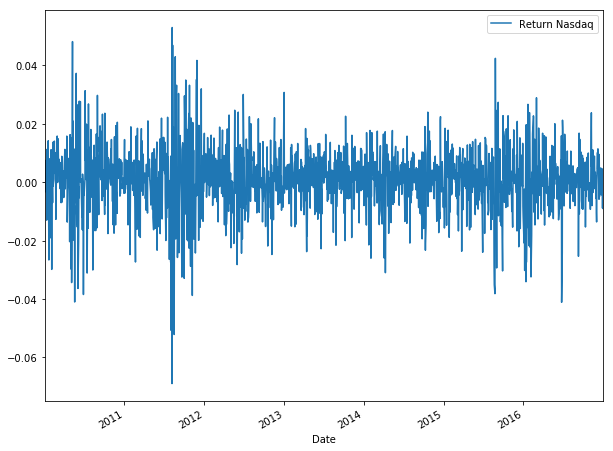

In [23]:
nasdaq['Return_Nasdaq'].plot()
plt.legend(('Return Nasdaq',))
plt.show()

In [24]:
pd.isnull(nasdaq).any().sum()

1

In [25]:
nasdaq.shape

(1762, 7)

# Dow Jones Industrial Average (Quandl)

In [26]:
djia = quandl.get("BCIW/_SPXT", authtoken="7H34SAjpHzAuPdL5EtVG",\
                  trim_start='2010-01-01', trim_end='2016-12-31')

In [27]:
djia.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-08-11,1821.75,1866.86,1814.78,1817.13,0.0
2010-08-12,1813.01,1813.01,1795.77,1807.61,0.0
2010-08-13,1807.54,1812.01,1799.95,1800.39,0.0
2010-08-16,1799.99,1806.00,1784.18,1800.70,0.0
2010-08-17,1801.27,1835.33,1801.27,1823.18,0.0


In [28]:
djia.columns.values[-1]

'Volume'

In [29]:
djia.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,4318.41,4325.17,4315.71,4325.17,0.0
2016-12-27,4329.87,4344.26,4329.87,4334.93,0.0
2016-12-28,4338.25,4340.30,4297.92,4299.45,0.0
2016-12-29,4298.86,4308.37,4289.42,4298.39,0.0
2016-12-30,4303.09,4306.70,4268.71,4278.66,0.0


In [30]:
djia = pd.read_csv("^DJI.csv", header=0, parse_dates=[0], index_col=0)

In [31]:
djia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-23,19908.609375,19934.150391,19899.060547,19933.810547,19933.810547,158260000
2016-12-27,19943.460938,19980.240234,19939.800781,19945.039063,19945.039063,158540000
2016-12-28,19964.310547,19981.109375,19827.310547,19833.679688,19833.679688,188350000
2016-12-29,19835.460938,19878.439453,19788.939453,19819.779297,19819.779297,172040000
2016-12-30,19833.169922,19852.550781,19718.669922,19762.599609,19762.599609,271910000


In [32]:
djia.columns.values[-2] = 'AdjClose'

In [33]:
djia.columns = djia.columns+'_Djia'

In [34]:
djia.columns

Index(['Open_Djia', 'High_Djia', 'Low_Djia', 'Close_Djia', 'AdjClose_Djia',
       'Volume_Djia'],
      dtype='object')

In [35]:
djia['Return_Djia'] = djia['AdjClose_Djia'].pct_change()

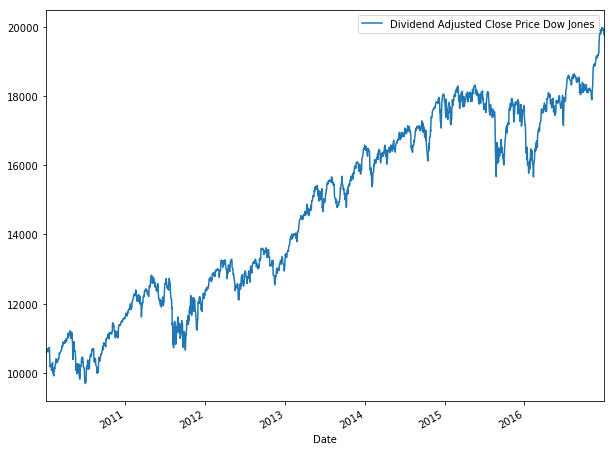

In [36]:
djia['AdjClose_Djia'].plot()
plt.legend(("Dividend Adjusted Close Price Dow Jones",))
plt.show()

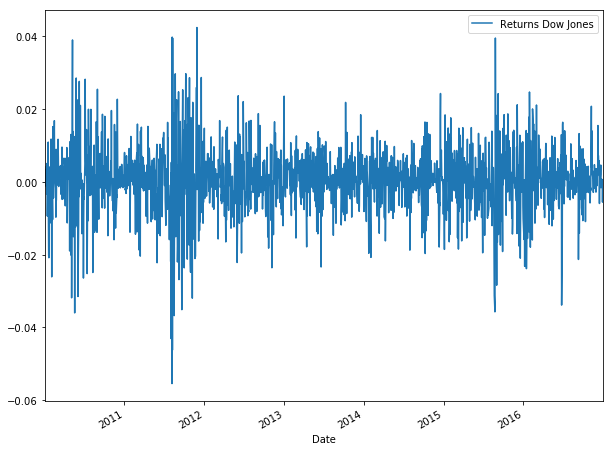

In [37]:
djia['Return_Djia'].plot()
plt.legend(('Returns Dow Jones',))
plt.show()

In [38]:
pd.isnull(djia).any().sum()

1

In [39]:
djia.shape

(1762, 7)

# 5 Years US Treasury YTM ^FVX Yahoo Finance

In [40]:
treasuey = data.get_data_yahoo('^FVX', start,end)

In [41]:
treasuey.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2.684,2.684,2.633,2.652,2.652,0.0
2010-01-05,2.583,2.593,2.549,2.558,2.558,0.0
2010-01-06,2.566,2.625,2.558,2.573,2.573,0.0
2010-01-07,2.625,2.642,2.574,2.600,2.600,0.0
2010-01-08,2.642,2.654,2.527,2.566,2.566,0.0


In [42]:
treasuey.columns.values[-2] = 'AdjClose'

In [43]:
treasuey.columns = treasuey.columns+'_Treasury'

In [44]:
treasuey['Return_Treasury'] = treasuey['AdjClose_Treasury'].pct_change()
treasuey.columns

Index(['Open_Treasury', 'High_Treasury', 'Low_Treasury', 'Close_Treasury',
       'AdjClose_Treasury', 'Volume_Treasury', 'Return_Treasury'],
      dtype='object')

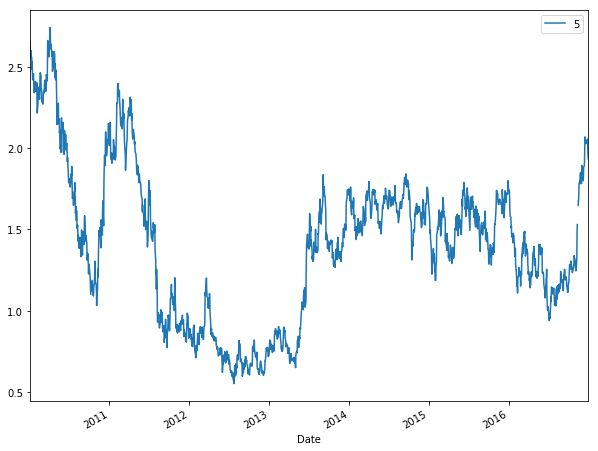

In [45]:
treasuey['AdjClose_Treasury'].plot()
plt.legend(('5 Year YTM US Treasury'))
plt.show()

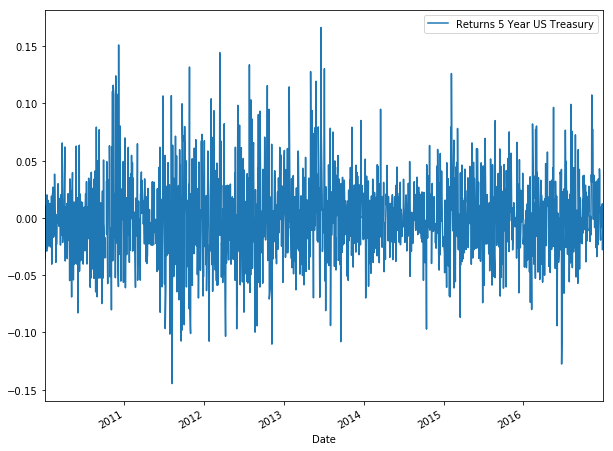

In [46]:
treasuey['Return_Treasury'].plot()
plt.legend(('Returns 5 Year US Treasury',))
plt.show()

In [47]:
pd.isnull(treasuey).any().sum()

7

In [48]:
treasuey.shape

(1762, 7)

# Hong Kong Hang Seng ^HSI Yahoo Finance

In [49]:
hkong = data.get_data_yahoo('^HSI',start,end)
hkong.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,21860.039063,22024.830078,21689.220703,21823.279297,21823.279297,1.006200e+09
2010-01-05,22092.150391,22297.039063,21987.269531,22279.580078,22279.580078,1.965585e+09
2010-01-06,22357.460938,22514.789063,22277.130859,22416.669922,22416.669922,2.100234e+09
2010-01-07,22548.029297,22548.029297,22169.609375,22269.449219,22269.449219,1.495365e+09
2010-01-08,22282.750000,22443.220703,22206.160156,22296.750000,22296.750000,1.626023e+09


In [50]:
hkong.columns.values[-2] = 'AdjClose'
hkong.columns = hkong.columns + '_HKong'
hkong['Return_HKong'] = hkong['AdjClose_HKong'].pct_change()
hkong.columns

Index(['Open_HKong', 'High_HKong', 'Low_HKong', 'Close_HKong',
       'AdjClose_HKong', 'Volume_HKong', 'Return_HKong'],
      dtype='object')

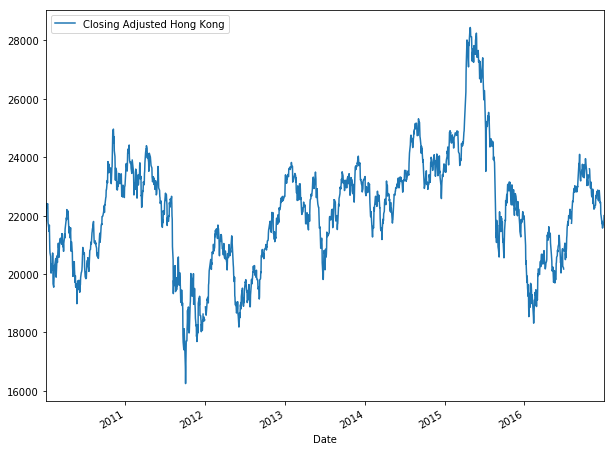

In [51]:
hkong['AdjClose_HKong'].plot()
plt.legend(('Closing Adjusted Hong Kong',))
plt.show()

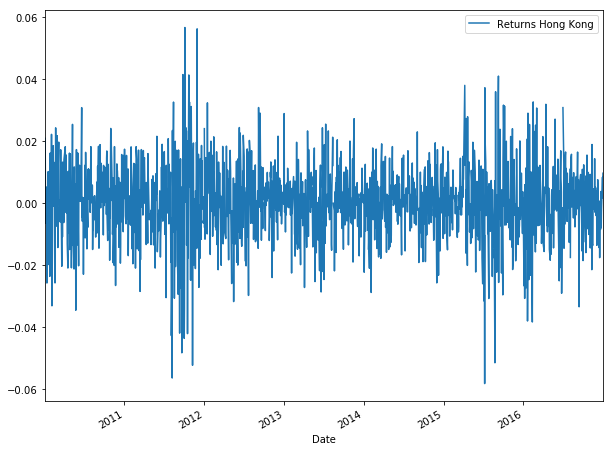

In [52]:
hkong['Return_HKong'].plot()
plt.legend(('Returns Hong Kong',))
plt.show()

In [53]:
pd.isnull(hkong).any().sum()

7

In [54]:
hkong.shape

(1729, 7)

# Frankfurt DAX ^GDAXI Yahoo Finance

In [55]:
frankfurt = data.get_data_yahoo('^GDAXI', start,end)
frankfurt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5975.520020,6048.299805,5974.430176,6048.299805,6048.299805,104344400.0
2010-01-05,6043.939941,6058.020020,6015.669922,6031.859863,6031.859863,117572100.0
2010-01-06,6032.390137,6047.569824,5997.089844,6034.330078,6034.330078,108742400.0
2010-01-07,6016.799805,6037.569824,5961.250000,6019.359863,6019.359863,133704300.0
2010-01-08,6028.620117,6053.040039,5972.240234,6037.609863,6037.609863,126099000.0


In [56]:
frankfurt.columns.values[-2] = 'AdjClose'
frankfurt.columns = frankfurt.columns + '_Frankfurt'
frankfurt['Return_Frankfurt'] = frankfurt['AdjClose_Frankfurt'].pct_change()
frankfurt.columns

Index(['Open_Frankfurt', 'High_Frankfurt', 'Low_Frankfurt', 'Close_Frankfurt',
       'AdjClose_Frankfurt', 'Volume_Frankfurt', 'Return_Frankfurt'],
      dtype='object')

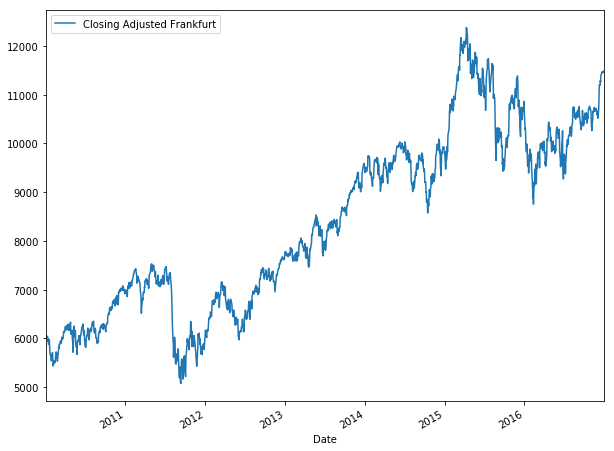

In [57]:
frankfurt['AdjClose_Frankfurt'].plot()
plt.legend(('Closing Adjusted Frankfurt',))
plt.show()

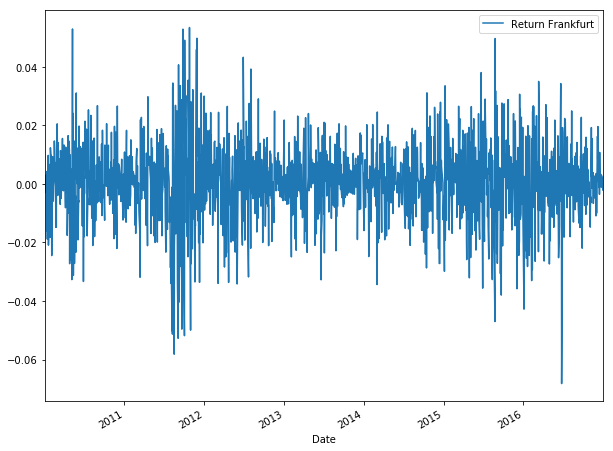

In [58]:
frankfurt['Return_Frankfurt'].plot()
plt.legend(('Return Frankfurt',))
plt.show()

In [59]:
pd.isnull(frankfurt).any().sum()

7

In [60]:
frankfurt.shape

(1778, 7)

# Paris CAC 40 ^FCHI Yahoo Finance

In [61]:
paris = data.get_data_yahoo('^FCHI',start,end)
paris.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,3952.209961,4013.969971,3950.610107,4013.969971,4013.969971,113396000.0
2010-01-05,4012.429932,4028.340088,3993.330078,4012.909912,4012.909912,129518600.0
2010-01-06,4014.449951,4022.939941,3996.800049,4017.669922,4017.669922,110087000.0
2010-01-07,4005.959961,4032.239990,3983.899902,4024.800049,4024.800049,118430400.0
2010-01-08,4042.639893,4051.409912,4013.340088,4045.139893,4045.139893,131783200.0


In [62]:
paris.columns.values[-2] = 'AdjClose'
paris.columns = paris.columns + '_Paris'
paris['Return_Paris'] = paris['AdjClose_Paris'].pct_change()
paris.columns

Index(['Open_Paris', 'High_Paris', 'Low_Paris', 'Close_Paris',
       'AdjClose_Paris', 'Volume_Paris', 'Return_Paris'],
      dtype='object')

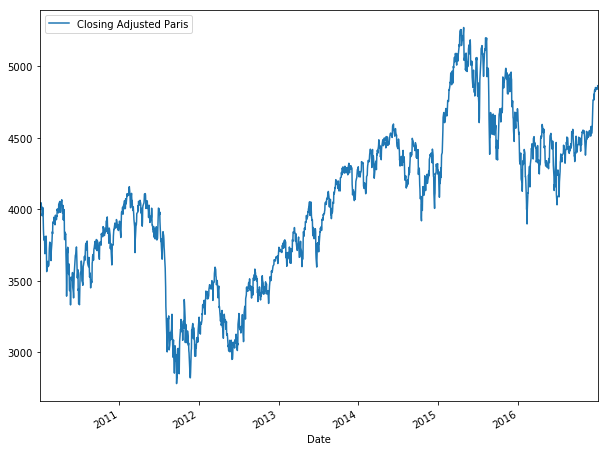

In [63]:
paris['AdjClose_Paris'].plot()
plt.legend(('Closing Adjusted Paris',))
plt.show()

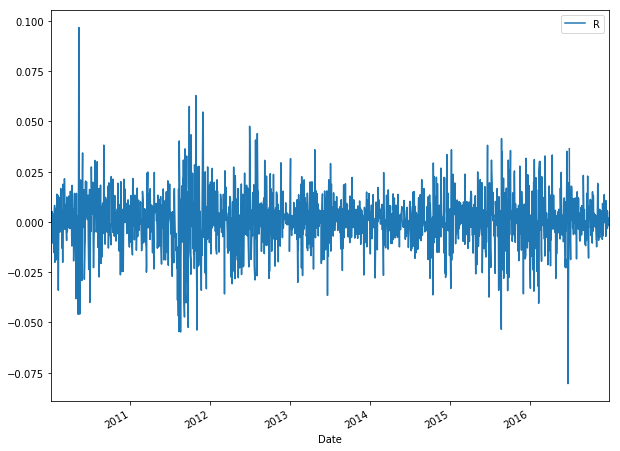

In [64]:
paris['Return_Paris'].plot()
plt.legend('Return Paris stock')
plt.show()

In [65]:
paris.shape

(1790, 7)

In [66]:
paris.shape[0]*paris.shape[1] - paris.count().sum()

15

# Tokyo Nikkei-225 ^N225 Yahoo Finance

In [67]:
nikkei = data.get_data_yahoo('^N225',start,end)
nikkei.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10609.339844,10694.490234,10608.139648,10654.790039,10654.790039,104400
2010-01-05,10719.440430,10791.040039,10655.570313,10681.830078,10681.830078,166200
2010-01-06,10709.549805,10768.610352,10661.169922,10731.450195,10731.450195,181800
2010-01-07,10742.750000,10774.000000,10636.669922,10681.660156,10681.660156,182600
2010-01-08,10743.299805,10816.450195,10677.559570,10798.320313,10798.320313,211800


In [68]:
nikkei.columns.values[-2] = 'AdjClose'
nikkei.columns = nikkei.columns + '_Nikkei'
nikkei['Return_Nikkei'] = nikkei['AdjClose_Nikkei'].pct_change()
nikkei.columns

Index(['Open_Nikkei', 'High_Nikkei', 'Low_Nikkei', 'Close_Nikkei',
       'AdjClose_Nikkei', 'Volume_Nikkei', 'Return_Nikkei'],
      dtype='object')

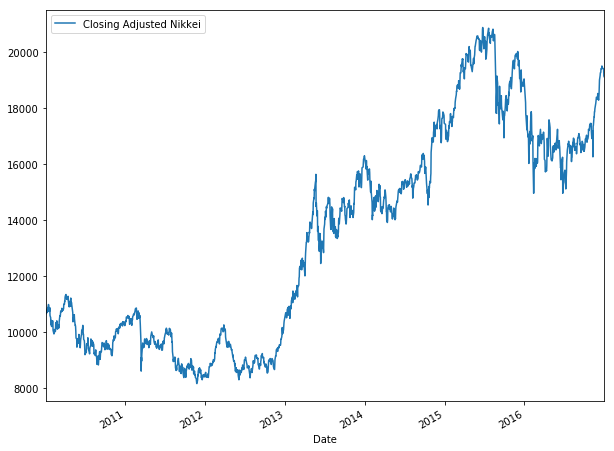

In [69]:
nikkei['AdjClose_Nikkei'].plot()
plt.legend(('Closing Adjusted Nikkei',))
plt.show()

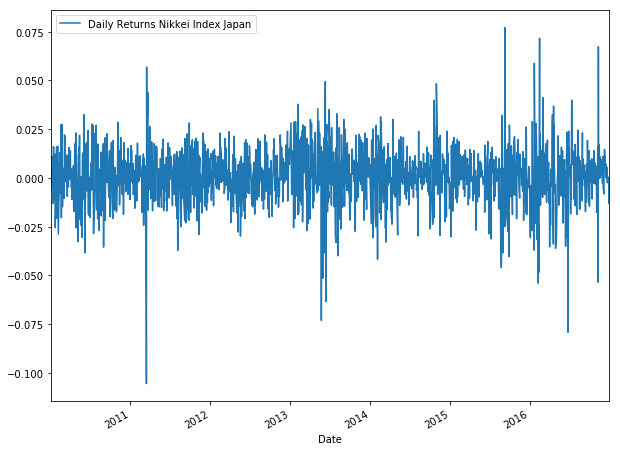

In [70]:
nikkei['Return_Nikkei'].plot()
plt.legend(('Daily Returns Nikkei Index Japan',))
plt.show()

In [71]:
pd.isnull(nikkei).any().sum()

1

In [72]:
nikkei.shape

(1714, 7)

# London FTSE-100 ^FTSE Yahoo Finance

In [73]:
london = data.get_data_yahoo('^FTSE',start,end)
london.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5412.899902,5500.299805,5410.799805,5500.299805,5500.299805,7.509420e+08
2010-01-05,5500.299805,5536.399902,5480.700195,5522.500000,5522.500000,1.149301e+09
2010-01-06,5522.500000,5536.500000,5497.700195,5530.000000,5530.000000,9.982953e+08
2010-01-07,5530.000000,5551.700195,5499.799805,5526.700195,5526.700195,1.162934e+09
2010-01-08,5526.700195,5549.299805,5494.799805,5534.200195,5534.200195,1.006421e+09


In [74]:
london.columns.values[-2] = 'AdjClose'
london.columns = london.columns + '_London'
london['Return_London'] = london['AdjClose_London'].pct_change()
london.columns

Index(['Open_London', 'High_London', 'Low_London', 'Close_London',
       'AdjClose_London', 'Volume_London', 'Return_London'],
      dtype='object')

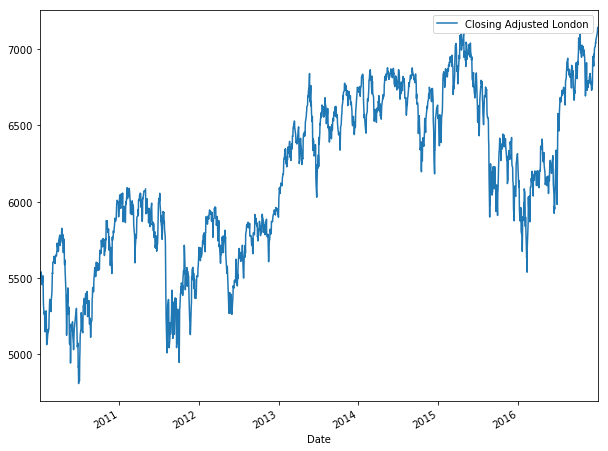

In [75]:
london['AdjClose_London'].plot()
plt.legend(('Closing Adjusted London',))
plt.show()

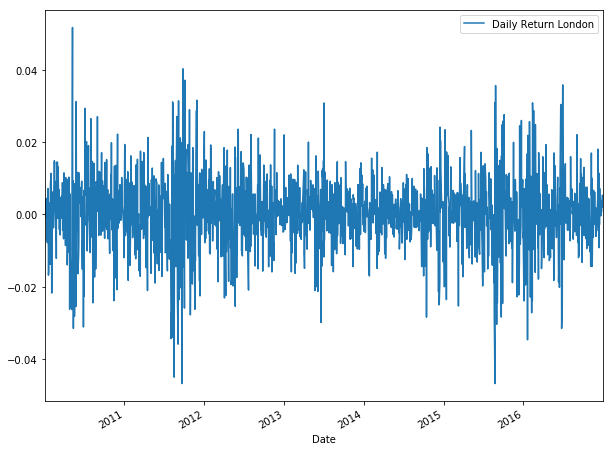

In [76]:
london['Return_London'].plot()
plt.legend(('Daily Return London',))
plt.show()

In [77]:
pd.isnull(london).any().sum()

7

In [78]:
london.shape

(1768, 7)

# Oil Price US Department for Energy (Quandl)

In [79]:
oil = quandl.get("OPEC/ORB", authtoken="7H34SAjpHzAuPdL5EtVG",
                trim_start=start, trim_end=end)

In [80]:
oil.columns

Index(['Value'], dtype='object')

In [81]:
oil.head()

,Value
Date,
2010-01-04,78.23
2010-01-05,79.14
2010-01-06,79.70
2010-01-07,80.19
2010-01-08,79.94


In [82]:
oil.columns = oil.columns + '_Oil'

In [83]:
oil['Delta_Oil'] = oil['Value_Oil'].pct_change()

In [84]:
oil.columns

Index(['Value_Oil', 'Delta_Oil'], dtype='object')

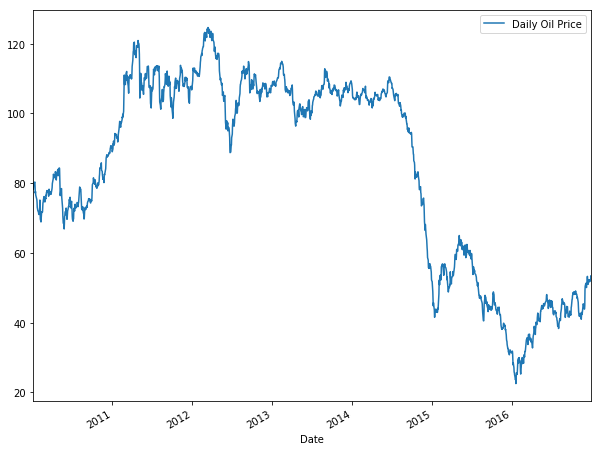

In [85]:
oil.Value_Oil.plot()
plt.legend(("Daily Oil Price",))
plt.show()

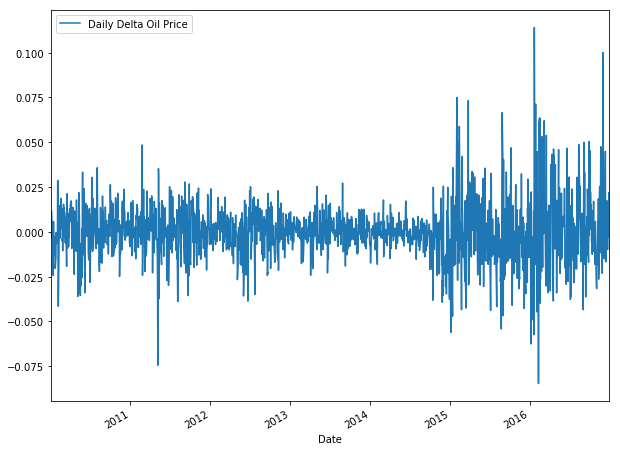

In [86]:
oil['Delta_Oil'].plot()
plt.legend(('Daily Delta Oil Price',))
plt.show()

In [87]:
pd.isnull(oil).any().sum()

1

In [88]:
oil.shape

(1808, 2)

# Gold Price (Bundesbank - Quandl)

In [89]:
gold = quandl.get("BUNDESBANK/BBK01_WT5511", authtoken="7H34SAjpHzAuPdL5EtVG",
                  trim_start=start, trim_end=end)

In [90]:
gold.head()

,Value
Date,
2010-01-04,1113.00
2010-01-05,1125.25
2010-01-06,1125.00
2010-01-07,1130.75
2010-01-08,1121.75


In [91]:
gold.columns = gold.columns+'_Gold'

In [92]:
gold['Delta_Gold'] = gold['Value_Gold'].pct_change()
gold.columns

Index(['Value_Gold', 'Delta_Gold'], dtype='object')

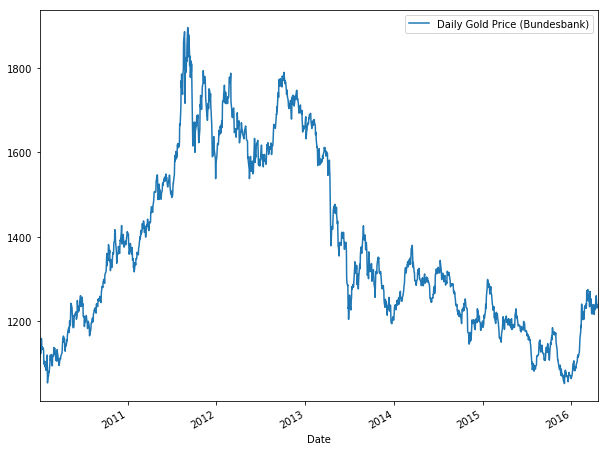

In [93]:
gold['Value_Gold'].plot()
plt.legend(('Daily Gold Price (Bundesbank)',))
plt.show()

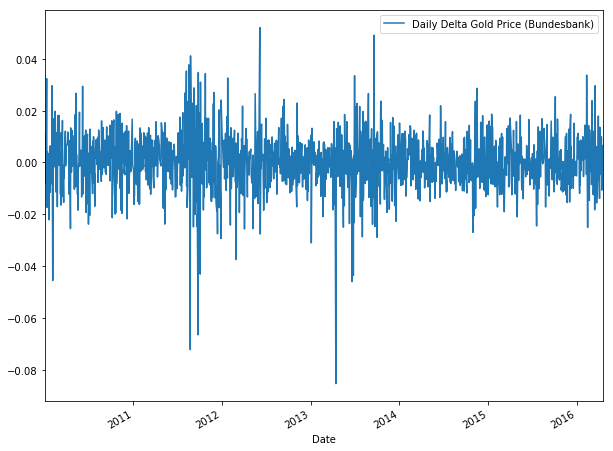

In [94]:
gold['Delta_Gold'].plot()
plt.legend(('Daily Delta Gold Price (Bundesbank)',))
plt.show()

In [95]:
pd.isnull(gold).any().sum()

1

In [96]:
gold.shape

(1589, 2)

# Dollar in Euros Rate Exchange

In [97]:
euro = quandl.get("ECB/EURUSD", authtoken="7H34SAjpHzAuPdL5EtVG",
                 trim_start=start, trim_end=end)

In [98]:
euro.head()

,Value
Date,
2010-01-04,1.4389
2010-01-05,1.4442
2010-01-06,1.4350
2010-01-07,1.4304
2010-01-08,1.4273


In [99]:
euro.columns = euro.columns + '_Euro'
euro['Delta_Euro'] = euro['Value_Euro'].pct_change()
euro.columns

Index(['Value_Euro', 'Delta_Euro'], dtype='object')

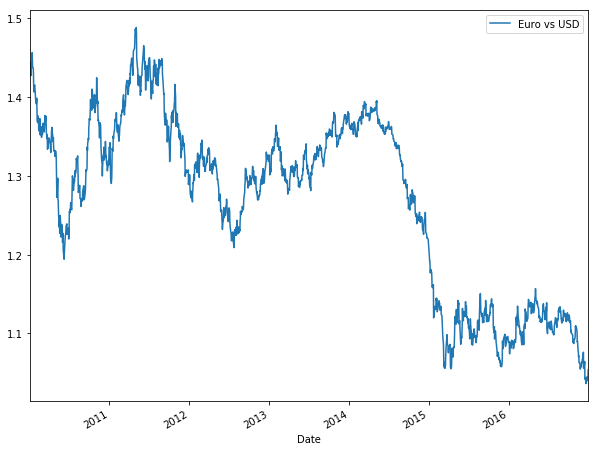

In [100]:
euro['Value_Euro'].plot()
plt.legend(('Euro vs USD',))
plt.show()

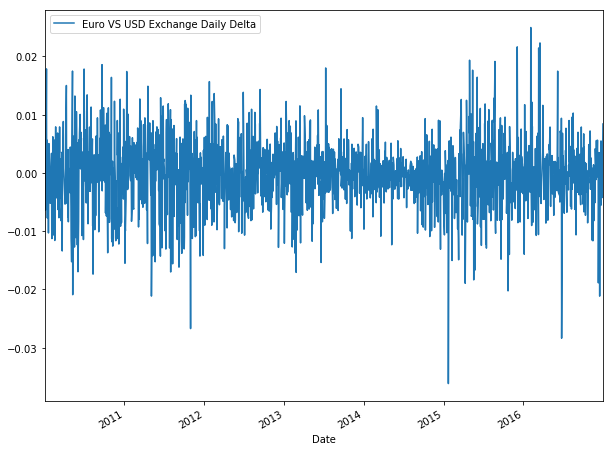

In [101]:
euro['Delta_Euro'].plot()
plt.legend(('Euro VS USD Exchange Daily Delta',))
plt.show()

In [102]:
pd.isnull(euro).any().sum()

1

In [103]:
euro.shape

(1794, 2)

# Dollar in Japenese Yen Rate 

In [104]:
yen = quandl.get("CUR/JPY", authtoken="7H34SAjpHzAuPdL5EtVG",
                 trim_start=start, trim_end=end)

In [105]:
yen.head()

,RATE
DATE,
2010-01-01,92.910732
2010-01-02,92.741464
2010-01-03,92.741464
2010-01-04,92.647589
2010-01-05,91.664585


In [106]:
yen.columns = yen.columns + '_Yen'
yen['Delta_Yen'] = yen['RATE_Yen'].pct_change()
yen.columns

Index(['RATE_Yen', 'Delta_Yen'], dtype='object')

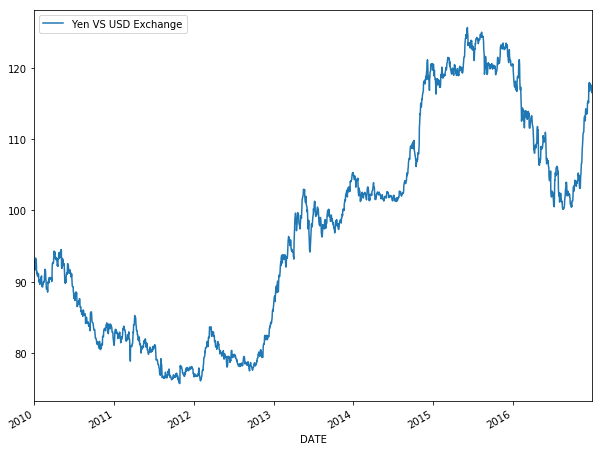

In [107]:
yen['RATE_Yen'].plot()
plt.legend(('Yen VS USD Exchange',))
plt.show()

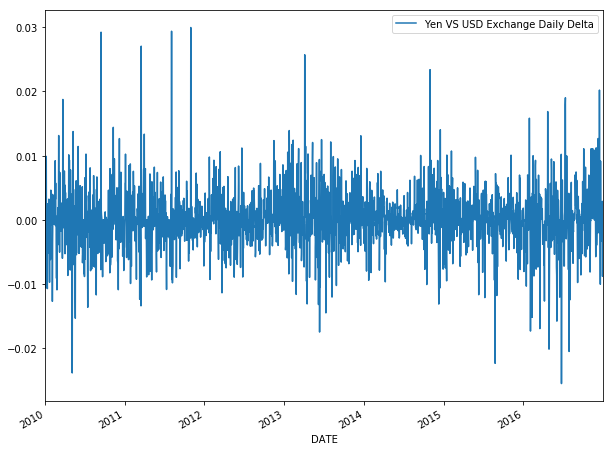

In [108]:
yen['Delta_Yen'].plot()
plt.legend(('Yen VS USD Exchange Daily Delta',))
plt.show()

In [109]:
pd.isnull(yen).any().sum()

1

In [110]:
yen.shape

(2555, 2)

# Dollar in Australian Dollars Rate

In [111]:
aus = quandl.get("CUR/AUD", authtoken="7H34SAjpHzAuPdL5EtVG",
                trim_start = start, trim_end=end)

In [112]:
aus.head()

,RATE
DATE,
2010-01-01,1.108609
2010-01-04,1.098303
2010-01-05,1.094237
2010-01-06,1.089190
2010-01-07,1.090879


In [113]:
aus.columns = aus.columns + '_Aud'
aus['Delta_Aud'] = aus['RATE_Aud'].pct_change()
aus.columns

Index(['RATE_Aud', 'Delta_Aud'], dtype='object')

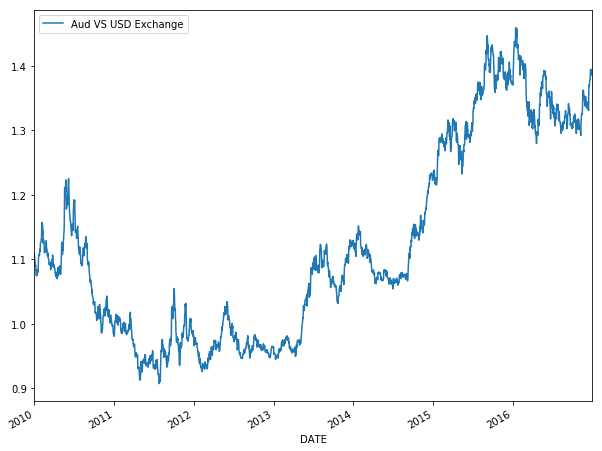

In [114]:
aus['RATE_Aud'].plot()
plt.legend(('Aud VS USD Exchange',))
plt.show()

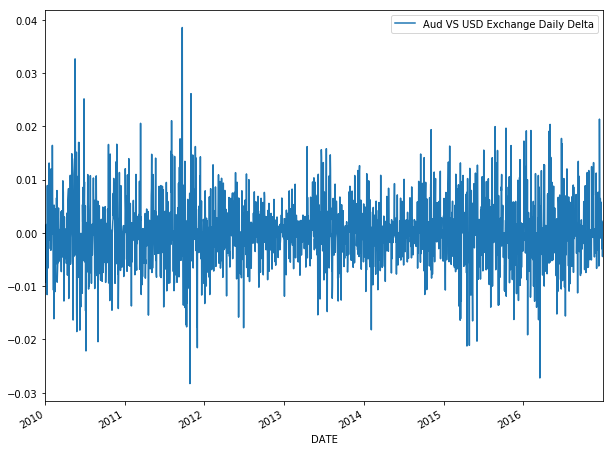

In [115]:
aus['Delta_Aud'].plot()
plt.legend(('Aud VS USD Exchange Daily Delta',))
plt.show()

In [116]:
pd.isnull(aus).any().sum()

1

In [117]:
aus.shape

(2457, 2)

# Merge

In [118]:
datasets = [sp, nasdaq, treasuey, hkong, frankfurt, paris, nikkei, london,\
            oil, gold, euro, yen, aus]

In [168]:
to_be_merged = [nasdaq[['Return_Nasdaq']],
                treasuey[['Return_Treasury']],
                hkong[['Return_HKong']],
                frankfurt[['Return_Frankfurt']],
                paris[['Return_Paris']],
                nikkei[['Return_Nikkei']],
                london[['Return_London']],
                oil[['Delta_Oil']],
                gold[['Delta_Gold']],
                euro[['Delta_Euro']],
                yen[['Delta_Yen']],
                aus[['Delta_Aud']]]

In [169]:
finance = sp[['Return_SP500']].join(to_be_merged, how = 'outer')

In [170]:
finance.shape

(2555, 13)

In [171]:
finance.tail()

,Return_SP500,Return_Nasdaq,Return_Treasury,Return_HKong,Return_Frankfurt,Return_Paris,Return_Nikkei,Return_London,Delta_Oil,Delta_Gold,Delta_Euro,Delta_Yen,Delta_Aud
2016-12-27,0.002248,0.004531,0.012315,NaN,0.001949,0.001777,0.000331,NaN,0.009857,NaN,-0.000096,0.002794,0.000842
2016-12-28,-0.008357,-0.008908,-0.027737,0.008342,0.000240,-0.000056,-0.000069,0.005362,0.021818,NaN,-0.004213,0.000733,0.001862
2016-12-29,-0.000293,-0.001190,-0.018018,0.001663,-0.002086,-0.001968,-0.013225,0.001998,0.001311,NaN,0.005000,-0.008829,-0.004462
2016-12-30,-0.004637,-0.009015,-0.014271,0.009621,0.002621,0.004927,-0.001607,0.003160,-0.002993,NaN,0.008419,0.001133,-0.001463
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002846,0.002144


In [172]:
finance.shape[0]*finance.shape[1] - finance.count().sum() #NaN

8972

In [173]:
finance = finance.interpolate(method='time')

In [174]:
finance.shape[0]*finance.shape[1] - finance.count().sum() #NaN

48

In [175]:
finance = finance.fillna(finance.mean())

In [176]:
finance.shape[0]*finance.shape[1] - finance.count().sum() #NaN

0

In [177]:
finance.tail()

,Return_SP500,Return_Nasdaq,Return_Treasury,Return_HKong,Return_Frankfurt,Return_Paris,Return_Nikkei,Return_London,Delta_Oil,Delta_Gold,Delta_Euro,Delta_Yen,Delta_Aud
2016-12-27,0.002248,0.004531,0.012315,0.006106,0.001949,0.001777,0.000331,0.004417,0.009857,0.006465,-0.000096,0.002794,0.000842
2016-12-28,-0.008357,-0.008908,-0.027737,0.008342,0.000240,-0.000056,-0.000069,0.005362,0.021818,0.006465,-0.004213,0.000733,0.001862
2016-12-29,-0.000293,-0.001190,-0.018018,0.001663,-0.002086,-0.001968,-0.013225,0.001998,0.001311,0.006465,0.005000,-0.008829,-0.004462
2016-12-30,-0.004637,-0.009015,-0.014271,0.009621,0.002621,0.004927,-0.001607,0.003160,-0.002993,0.006465,0.008419,0.001133,-0.001463
2016-12-31,-0.004637,-0.009015,-0.014271,0.009621,0.002621,0.004927,-0.001607,0.003160,-0.002993,0.006465,0.008419,0.002846,0.002144


# Temporally Shifting

In [178]:
######## shifting S&P backwards one day in order to have the return 
######## of today matched with the return on yesterday of the other predictors

shiftBack = -1
finance.Return_SP500 = finance.Return_SP500.shift()

In [179]:
delays = range(1,30)
maxDelay = max(delays)
columns = finance.columns[1:]

In [180]:
for column in columns:
    for delay in delays:
        newColumn = column + str(delay)
        finance[newColumn] = finance[column].shift(delay)

In [181]:
finance.head()

,Return_SP500,Return_Nasdaq,Return_Treasury,Return_HKong,Return_Frankfurt,Return_Paris,Return_Nikkei,Return_London,Delta_Oil,Delta_Gold,...,Delta_Aud20,Delta_Aud21,Delta_Aud22,Delta_Aud23,Delta_Aud24,Delta_Aud25,Delta_Aud26,Delta_Aud27,Delta_Aud28,Delta_Aud29
2010-01-01,NaN,0.000517,-0.000111,0.000144,0.000260,0.000054,0.000253,0.000123,-0.000304,0.000940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,0.000375,0.000517,-0.000111,0.000144,0.000260,0.000054,0.000253,0.000123,-0.000304,0.000940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,0.000375,0.000517,-0.000111,0.000144,0.000260,0.000054,0.000253,0.000123,-0.000304,0.000940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.000375,0.000517,-0.000111,0.000144,0.000260,0.000054,0.000253,0.000123,-0.000304,0.000940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.000375,0.000126,-0.035445,0.020909,-0.002718,-0.000264,0.002538,0.004036,0.011632,0.011006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
finance = finance.iloc[maxDelay:-1,:]

In [183]:
finance.shape

(2525, 361)

In [184]:
finance.head()

,Return_SP500,Return_Nasdaq,Return_Treasury,Return_HKong,Return_Frankfurt,Return_Paris,Return_Nikkei,Return_London,Delta_Oil,Delta_Gold,...,Delta_Aud20,Delta_Aud21,Delta_Aud22,Delta_Aud23,Delta_Aud24,Delta_Aud25,Delta_Aud26,Delta_Aud27,Delta_Aud28,Delta_Aud29
2010-01-30,-0.009829,-0.005981,-0.013048,-0.005659,0.010953,0.011168,-0.013615,0.009329,-0.003595,-0.005727,...,-0.008969,-0.006336,-0.003702,0.001551,-0.004612,-0.003702,-0.009296,0.000086,0.000086,0.000086
2010-01-31,-0.001797,0.002563,-0.000774,0.000196,0.009550,0.008599,-0.006465,0.010341,-0.001727,-0.003210,...,-0.011603,-0.008969,-0.006336,-0.003702,0.001551,-0.004612,-0.003702,-0.009296,0.000086,0.000086
2010-02-01,0.006234,0.011107,0.011499,0.006051,0.008146,0.006030,0.000684,0.011352,0.000141,-0.000693,...,0.008877,-0.011603,-0.008969,-0.006336,-0.003702,0.001551,-0.004612,-0.003702,-0.009296,0.000086
2010-02-02,0.014266,0.008686,-0.007579,0.001404,0.009759,0.013323,0.016273,0.006841,0.028583,0.029575,...,-0.001529,0.008877,-0.011603,-0.008969,-0.006336,-0.003702,0.001551,-0.004612,-0.003702,-0.009296
2010-02-03,0.012973,0.000388,0.019092,0.022193,-0.006580,-0.004895,0.003205,-0.005697,0.028611,0.004039,...,-0.006650,-0.001529,0.008877,-0.011603,-0.008969,-0.006336,-0.003702,0.001551,-0.004612,-0.003702


In [185]:
finance['UpDown'] = finance['Return_SP500']

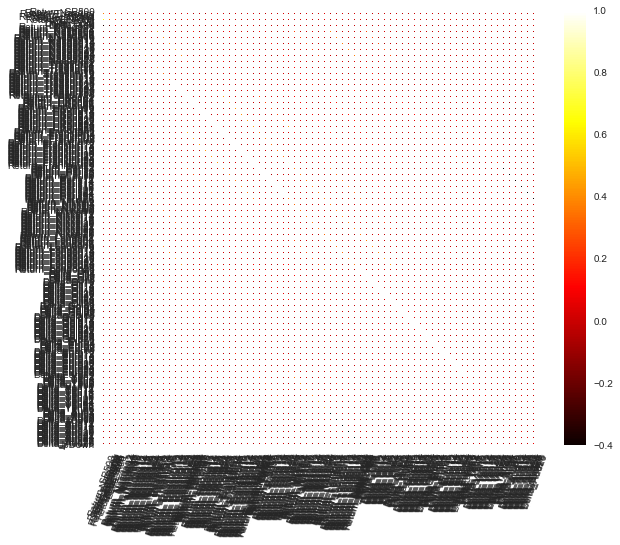

In [216]:
corr = finance.corr()
from matplotlib.artist import setp
#setp(x.get_xticklabels(), rotation=90)
plt.xticks(rotation=70)
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [186]:
upd = finance.UpDown

In [187]:
upd.astype('str')

2010-01-30     -0.00982917366505
2010-01-31     -0.00179741290101
2010-02-01      0.00623434786302
2010-02-02       0.0142661086271
2010-02-03       0.0129729484896
2010-02-04     -0.00547431143785
2010-02-05      -0.0311406779463
2010-02-06      0.00289711887148
2010-02-07     -0.00102301753089
2010-02-08     -0.00494315393325
2010-02-09     -0.00886329033562
2010-02-10       0.0130401329848
2010-02-11     -0.00223257384761
2010-02-12      0.00968043772911
2010-02-13     -0.00274459287657
2010-02-14      0.00244174242126
2010-02-15      0.00762807771909
2010-02-16       0.0128144130169
2010-02-17       0.0180007483147
2010-02-18      0.00423795977713
2010-02-19      0.00658474223441
2010-02-20      0.00218662209171
2010-02-21      0.00110912883716
2010-02-22     3.16355826121e-05
2010-02-23     -0.00104585767194
2010-02-24      -0.0121028094322
2010-02-25      0.00972045882815
2010-02-26     -0.00208104033586
2010-02-27      0.00140537933425
2010-02-28      0.00432308907078
          

In [237]:
#upd.to_string(header=True)

In [188]:
upd[upd >= 0] = 'Up'

upd[upd != 'Up'] = 'Down'

finance.UpDown = upd.copy()

finance.UpDown

2010-01-30    Down
2010-01-31    Down
2010-02-01      Up
2010-02-02      Up
2010-02-03      Up
2010-02-04    Down
2010-02-05    Down
2010-02-06      Up
2010-02-07    Down
2010-02-08    Down
2010-02-09    Down
2010-02-10      Up
2010-02-11    Down
2010-02-12      Up
2010-02-13    Down
2010-02-14      Up
2010-02-15      Up
2010-02-16      Up
2010-02-17      Up
2010-02-18      Up
2010-02-19      Up
2010-02-20      Up
2010-02-21      Up
2010-02-22      Up
2010-02-23    Down
2010-02-24    Down
2010-02-25      Up
2010-02-26    Down
2010-02-27      Up
2010-02-28      Up
              ... 
2016-12-01    Down
2016-12-02    Down
2016-12-03      Up
2016-12-04      Up
2016-12-05      Up
2016-12-06      Up
2016-12-07      Up
2016-12-08      Up
2016-12-09      Up
2016-12-10      Up
2016-12-11      Up
2016-12-12      Up
2016-12-13    Down
2016-12-14      Up
2016-12-15    Down
2016-12-16      Up
2016-12-17    Down
2016-12-18    Down
2016-12-19      Up
2016-12-20      Up
2016-12-21      Up
2016-12-22  

In [189]:
finance.shape

(2525, 362)

In [190]:
finance.columns

Index(['Return_SP500', 'Return_Nasdaq', 'Return_Treasury', 'Return_HKong',
       'Return_Frankfurt', 'Return_Paris', 'Return_Nikkei', 'Return_London',
       'Delta_Oil', 'Delta_Gold',
       ...
       'Delta_Aud21', 'Delta_Aud22', 'Delta_Aud23', 'Delta_Aud24',
       'Delta_Aud25', 'Delta_Aud26', 'Delta_Aud27', 'Delta_Aud28',
       'Delta_Aud29', 'UpDown'],
      dtype='object', length=362)

In [191]:
fin = finance.copy()

In [197]:
fin = fin.drop(['Return_SP500'], axis=1)
fin.columns

Index(['Return_Nasdaq', 'Return_Treasury', 'Return_HKong', 'Return_Frankfurt',
       'Return_Paris', 'Return_Nikkei', 'Return_London', 'Delta_Oil',
       'Delta_Gold', 'Delta_Euro',
       ...
       'Delta_Aud21', 'Delta_Aud22', 'Delta_Aud23', 'Delta_Aud24',
       'Delta_Aud25', 'Delta_Aud26', 'Delta_Aud27', 'Delta_Aud28',
       'Delta_Aud29', 'UpDown'],
      dtype='object', length=361)

In [198]:
test = fin['UpDown']
len(test)

2525

In [199]:
train = fin.drop(['UpDown'], axis=1)
train.columns

Index(['Return_Nasdaq', 'Return_Treasury', 'Return_HKong', 'Return_Frankfurt',
       'Return_Paris', 'Return_Nikkei', 'Return_London', 'Delta_Oil',
       'Delta_Gold', 'Delta_Euro',
       ...
       'Delta_Aud20', 'Delta_Aud21', 'Delta_Aud22', 'Delta_Aud23',
       'Delta_Aud24', 'Delta_Aud25', 'Delta_Aud26', 'Delta_Aud27',
       'Delta_Aud28', 'Delta_Aud29'],
      dtype='object', length=360)

In [200]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(train, test,\
                                                    test_size=0.2, random_state=0)

In [204]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2020, 360)
(505, 360)
(2020,)
(505,)


In [229]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')

clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [230]:
pred = clf.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.5544554455445545

In [215]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [217]:
pred = clf.predict(X_test)

accuracy_score(y_test, pred)

0.86336633663366336

In [218]:
from sklearn import neighbors

In [219]:
clf = neighbors.KNeighborsClassifier()

In [220]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [221]:
pred = clf.predict(X_test)

In [222]:
accuracy_score(y_test, pred)

0.62970297029702971

---